<a href="https://colab.research.google.com/github/GUC-DM/mini-project-2-nada-ahmed-t07-mohamed-ashraf-t07/blob/main/Mini-Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project 2 - Clustering

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Nada Ahmed 

ID:43-1753

Tutorial: T07

---

Name: Mohammad Ashraf

ID: 43-16359

Tutorial: T07

---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Binary:

- mode (0 = Minor, 1 = Major; representing whether the track starts with a major (1) chord progression or not (0))
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

**Note**: the data URL is `https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv`

Importing Dataset 


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('telecom_churn.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv')
df

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


data cleaning and inspection 


In [46]:
df.isnull().any().any()

False

Capitalize all the columns names 


In [47]:
df.columns = df.columns.str.title()
df

,Mode,Genres,Acousticness,Danceability,Duration_Ms,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Popularity,Key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


Data Exploratory 


1. What are the 20 most danceable music genres?

In [48]:
x = df['Danceability'].nlargest(20,keep='first')
z = x.index
for i in z:
   i = df.iloc[i].iloc[1]
   print(i)


experimental house
guam indie
dutch hip hop
dutch rap pop
british children's music
indie deutschrap
trance mexicano
footwork
funk paulista
proto-rap
tamaulipas rap
danish hip hop
alberta hip hop
serbian electronic
corridos cristianos
trap venezolano
atmospheric post-rock
zouglou
miami bass
cumbia santafesina


2. What are the 20 lowest energy music genres?

In [49]:
x = df['Energy'].nsmallest(20,keep='first')
z = x.index
for i in z:
   i = df.iloc[i].iloc[1]
   print(i)


binaural
brain waves
korean classical piano
singing bowl
medieval
italian classical guitar
native american spiritual
caucasian classical piano
australian ambient
dutch classical piano
balkan classical piano
bible
baltic classical
boy soprano
australian choir
ghanaian traditional
warm drone
american 21st century classical
contemporary choir
hungarian contemporary classical


3. What are the 20 loudest music genres?

In [50]:
x = df['Loudness'].nlargest(20,keep='first')
z = x.index
for i in z:
   i = df.iloc[i].iloc[1]
   print(i)

nederlandse hardstyle
action rock
memphis indie
arabic hip hop
middle east hip hop
palestinian pop
japanese metalcore
birmingham hip hop
j-idol
japanese indie rock
japanese post-hardcore
nz hardcore
nz punk
belarusian pop
belarusian rock
xtra raw
norwegian punk rock
alt-idol
kawaii metal
russian dance


4.. What are the 20 music genres most commonly performed live?

In [51]:
x = df['Liveness'].nlargest(20,keep='first')
z = x.index
for i in z:
   i = df.iloc[i].iloc[1]
   print(i)

modular synth
gujarati garba
trance mexicano
mindfulness
birdsong
new comedy
deep comedy
autoharp
clean comedy
atmospheric post-metal
atmospheric sludge
dutch jazz
musica paraibana
irish banjo
west australian hip hop
greek house
organic electronic
j-acoustic
classic icelandic pop
turkish trap


5.What are the 20 most popular music genres?


In [52]:
x = df['Popularity'].nlargest(20,keep='first')
z = x.index
for i in z:
   i = df.iloc[i].iloc[1]
   print(i)


basshall
south african house
trap venezolano
turkish edm
alberta hip hop
chinese electropop
afroswing
afro soul
circuit
guaracha
indie triste
russian dance
uk diy punk
pagode baiano
ritmo kombina
trap triste
norwegian pop rap
urbano espanol
musica canaria
argentine hip hop


Clustering

1st : encode 'Genres' to perform elbow method as it doesn't accept strings 



In [53]:
df_Copy2 = df.copy()
categorical_columns = df.select_dtypes(include= [object, 'category'])

for column in categorical_columns:
         df_Copy2['Genres'] = df_Copy2['Genres'].astype('category').cat.codes

df_Copy2.head()

,Mode,Genres,Acousticness,Danceability,Duration_Ms,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Popularity,Key
0,1,0,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,2,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,3,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,4,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


2nd : apply elbow method which
 is one heurestic for choosing k or the number of clusters the K-Means algorithm should form

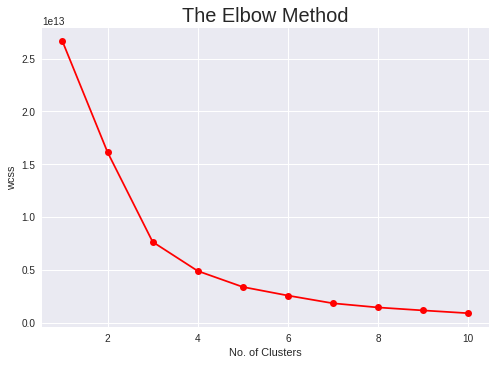

In [57]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_Copy2)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

3rd : choosing k = 6 for the clustering, we show 6 different clusters ( the variables are : 1.Energy as different genres ahave different levels of energy, 2.Loudness as different genres generate either loud or sof music, 3.Instrumentalness as some genres use instruments and some are just vocal , 4.Speechiness for detecting spoken words differentiate between genres, 5.Tempo vary from one genre to the other)





visualized in countplot diagram, showing the lowest clusters are 1,2 
we can also visualize it in Violin plot in which the the diagram is thinner at 1,2 and wider at 0,3 

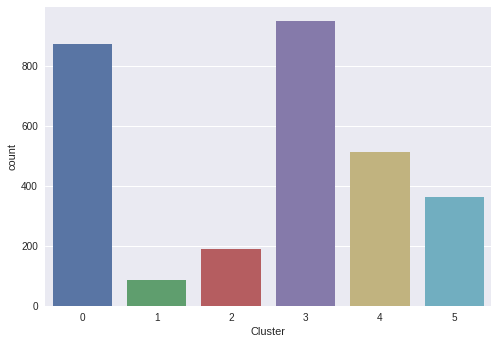

In [58]:
km = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)

Kloster = km.fit_predict(df_Copy2[['Energy', 'Loudness', 'Instrumentalness', 'Speechiness', 'Tempo' ]])
labels = km.labels_
df_Copy2['Cluster'] = labels
df['Cluster']=labels
sns.countplot(x='Cluster', data=df_Copy2)
#sns.violinplot(x='cluster', data=df_Copy2)

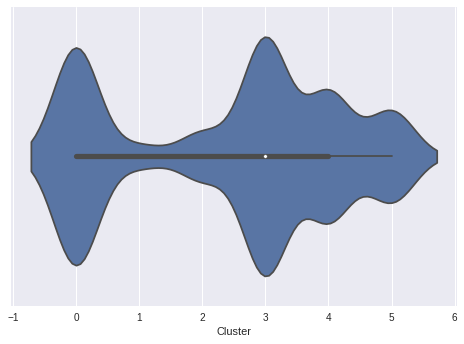

In [59]:
km = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)

Kloster = km.fit_predict(df_Copy2[['Energy', 'Loudness', 'Instrumentalness', 'Speechiness', 'Tempo' ]])
labels = km.labels_
df_Copy2['Cluster'] = labels
df['Cluster']=labels
#sns.countplot(x='cluster', data=df_Copy2)
sns.violinplot(x='Cluster', data=df_Copy2)

4th : we take 5 random samples from each cluster 


In [63]:
C1=df[df['Cluster']==0].sample(5)
C1


,Mode,Genres,Acousticness,Danceability,Duration_Ms,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Popularity,Key,Cluster
2191,1,pop soul,0.359155,0.601747,237169.179354,0.530434,0.003923,0.221794,-7.199840,0.098419,111.703672,0.414993,60.303571,2,0
2018,1,nu skool breaks,0.054217,0.620788,300169.242424,0.825606,0.450906,0.366642,-7.158667,0.094242,115.260394,0.361485,50.424242,10,0
477,1,celtic,0.659344,0.483083,224105.411727,0.422179,0.145727,0.175247,-12.308484,0.056776,115.116068,0.540164,37.939260,7,0
2160,0,polish pop,0.489000,0.592000,179500.000000,0.336000,0.000000,0.114000,-13.906000,0.038700,118.919000,0.555000,35.000000,5,0
1428,1,israeli folk,0.887687,0.474496,160580.104167,0.031602,0.056507,0.113085,-23.825333,0.107354,114.466625,0.327615,0.000000,11,0


In [64]:
C2=df[df['Cluster']==1].sample(5)
C2

,Mode,Genres,Acousticness,Danceability,Duration_Ms,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Popularity,Key,Cluster
2002,0,norwegian pop rap,0.131000,0.43000,211680.000000,0.60600,0.000000,0.173000,-5.115000,0.043100,169.988000,0.1230,76.000000,4,1
1961,1,nightcore,0.230050,0.61250,174010.500000,0.81650,0.061265,0.166950,-6.042000,0.073200,170.734000,0.5150,58.000000,5,1
1515,1,japanese power metal,0.007738,0.35725,290422.083333,0.90075,0.008440,0.157908,-4.615167,0.128142,156.922167,0.4032,50.083333,11,1
2718,1,thall,0.048925,0.41350,140520.000000,0.78800,0.487500,0.098650,-11.040000,0.036850,156.690000,0.7340,20.000000,2,1
1458,1,italian progressive metal,0.597000,0.30300,215867.000000,0.40000,0.682000,0.104000,-11.037000,0.031600,178.465000,0.4740,0.000000,0,1


In [65]:
C3=df[df['Cluster']==2].sample(5)
C3

,Mode,Genres,Acousticness,Danceability,Duration_Ms,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Popularity,Key,Cluster
354,0,breton folk,0.931000,0.123000,351880.000000,0.136000,0.003550,0.130000,-13.977000,0.041200,72.363000,0.037000,52.000000,10,2
37,0,afroswing,0.318450,0.711750,179995.375000,0.580187,0.000258,0.189950,-7.016687,0.195563,83.250125,0.676625,77.312500,11,2
2878,1,vintage dutch pop,0.851000,0.474000,243157.500000,0.315000,0.002465,0.476000,-18.673500,0.555000,89.248000,0.377500,9.000000,7,2
632,1,classical bass,0.965196,0.298565,350639.917083,0.203478,0.182930,0.258397,-18.739539,0.067603,92.887429,0.195912,12.647104,5,2
2524,1,sound,0.302760,0.183721,214438.201923,0.615921,0.781927,0.415838,-21.402311,0.090783,94.122208,0.076946,58.759615,1,2


In [66]:
C4=df[df['Cluster']==3].sample(5)
C4

,Mode,Genres,Acousticness,Danceability,Duration_Ms,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Popularity,Key,Cluster
1816,1,modern power pop,0.127392,0.466674,187564.117796,0.809819,0.148153,0.218762,-6.301224,0.047102,128.127980,0.530793,44.249536,6,3
445,1,canadian post-hardcore,0.064739,0.406158,233982.689855,0.828184,0.001214,0.208241,-6.134170,0.086536,121.597243,0.409991,45.802899,5,3
1955,1,new york drill,0.100473,0.842133,250180.010227,0.685124,0.000017,0.131306,-6.926756,0.229942,129.407191,0.511439,55.376136,9,3
10,0,acid house,0.067951,0.677400,297188.053846,0.724403,0.385891,0.233488,-9.381200,0.055855,126.492092,0.567677,46.638462,7,3
1326,0,hungarian edm,0.002510,0.857000,360015.000000,0.639000,0.743000,0.078200,-6.998000,0.074100,127.993000,0.097300,0.000000,11,3


In [67]:
C5=df[df['Cluster']==4].sample(5)
C5

,Mode,Genres,Acousticness,Danceability,Duration_Ms,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Popularity,Key,Cluster
2380,0,russian chanson,0.592707,0.558796,231556.222222,0.333019,0.047030,0.173976,-13.747148,0.049059,95.435148,0.574630,44.092593,7,4
2593,1,straight-ahead jazz,0.723946,0.477170,320530.162373,0.213076,0.641934,0.189361,-17.683395,0.042001,109.483395,0.361448,33.626946,5,4
2895,1,violin,0.877792,0.343846,351392.572867,0.202451,0.388337,0.153550,-18.992146,0.048292,109.200816,0.308061,31.440193,9,4
2424,1,sandalwood,0.947250,0.505583,241917.916667,0.417225,0.267758,0.150750,-10.141250,0.060558,97.487250,0.621750,0.000000,8,4
2280,1,quebec indie,0.290757,0.542225,224889.336957,0.717344,0.106100,0.185232,-8.129598,0.055289,96.121757,0.406931,53.670290,6,4


In [68]:
C6=df[df['Cluster']==5].sample(5)
C6

,Mode,Genres,Acousticness,Danceability,Duration_Ms,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Popularity,Key,Cluster
2243,0,progressive uplifting trance,0.005433,0.500056,307185.333333,0.943444,0.571946,0.226717,-6.092056,0.081144,134.351722,0.195556,0.611111,9,5
650,1,classical saxophone,0.525993,0.286680,338286.280000,0.442480,0.337012,0.197400,-15.349880,0.045200,134.246880,0.318116,43.920000,5,5
1230,0,griot,0.406333,0.454444,312378.555556,0.547889,0.240414,0.110300,-11.424333,0.046611,146.126000,0.501222,45.555556,11,5
1791,1,minneapolis indie,0.267469,0.596305,274549.499118,0.647547,0.144083,0.218648,-8.246335,0.084019,136.024222,0.544114,24.705467,9,5
2595,1,street punk,0.012318,0.361200,160424.000000,0.880600,0.065621,0.236020,-7.116400,0.081640,149.181000,0.563200,27.000000,9,5
